In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('test.csv')
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df.shape


(4277, 13)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


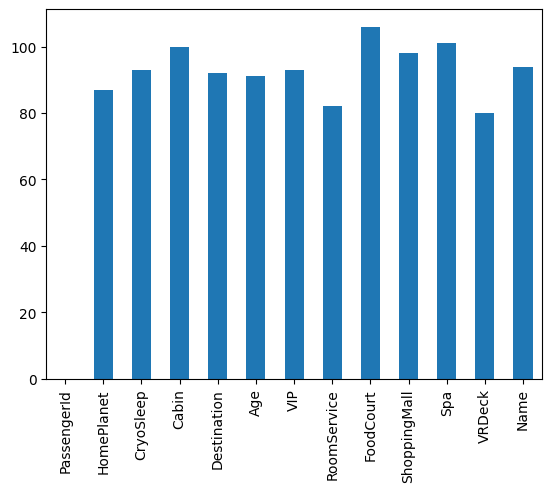

In [9]:
df.isnull().sum().plot.bar()
plt.show()


In [10]:
col = df.loc[:,'RoomService':'VRDeck'].columns
df.groupby('VIP')[col].mean()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,215.763334,405.711610,174.269240,274.936207,291.327467
True,519.905405,1747.378378,343.611111,1403.833333,1131.239437


In [11]:
df.groupby('CryoSleep')[col].mean()


,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,347.104489,701.532841,281.569988,474.511421,493.671042
True,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
temp = df['CryoSleep'] == True
df.loc[temp, col] = 0.0


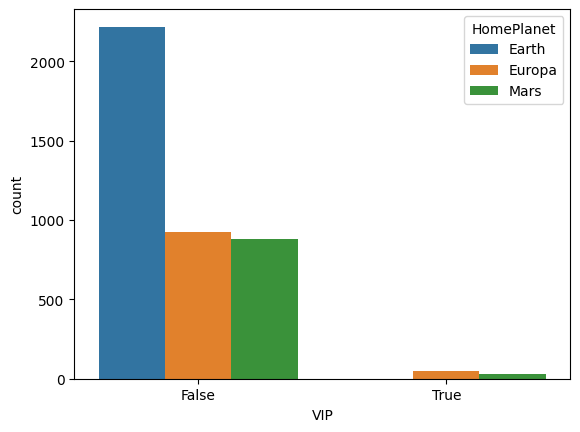

In [13]:
sb.countplot(data=df, x='VIP',
			hue='HomePlanet')
plt.show()



In [14]:
col = 'HomePlanet'
temp = df['VIP'] == False
df.loc[temp, col] = df.loc[temp, col].fillna('Earth')

temp = df['VIP'] == True
df.loc[temp, col] = df.loc[temp, col].fillna('Europa')


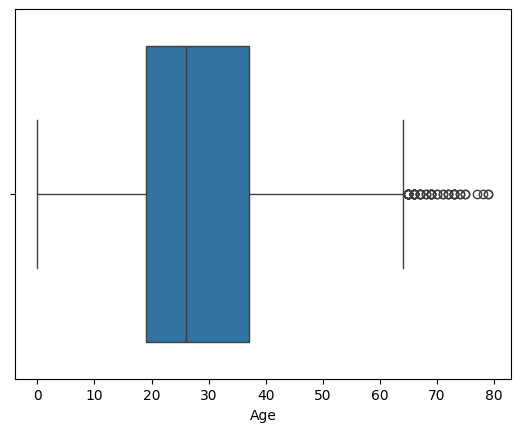

In [15]:
sb.boxplot(df['Age'],orient='h')
plt.show()


In [16]:
temp = df[df['Age'] < 61]['Age'].mean()
df['Age'] = df['Age'].fillna(temp)


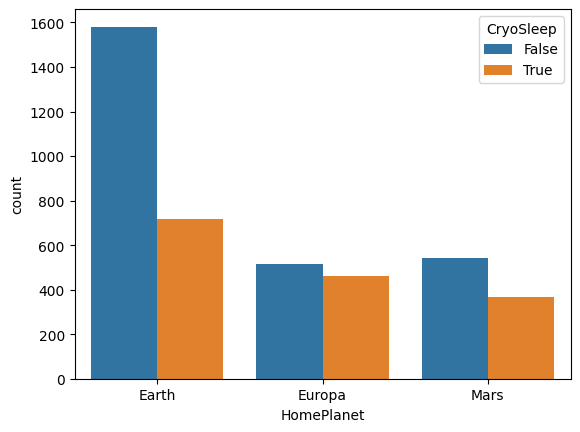

In [17]:
sb.countplot(data=df,
			x='HomePlanet',
			hue='CryoSleep')
plt.show()


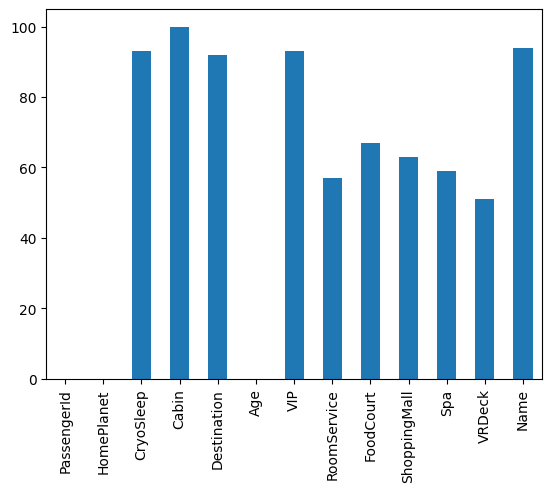

In [18]:
df.isnull().sum().plot.bar()
plt.show()


In [19]:
for col in df.columns:
	# Check for null values presence
	if df[col].isnull().sum() == 0:
		continue

	# If the data type is categorical filling by mode.
	if df[col].dtype == object or df[col].dtype == bool:
		df[col] = df[col].fillna(df[col].mode()[0])

	# Else by mean
	else:
		df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

In [20]:
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [21]:
new = df["PassengerId"].str.split("_", n=1, expand=True)
df["RoomNo"] = new[0].astype(int)
df["PassengerNo"] = new[1].astype(int)

df.drop(['PassengerId', 'Name'],
		axis=1, inplace=True)


In [22]:
data = df['RoomNo']
for i in range(df.shape[0]):
	temp = data == data[i]
	df['PassengerNo'][i] = (temp).sum() #this was throwing an indentation error


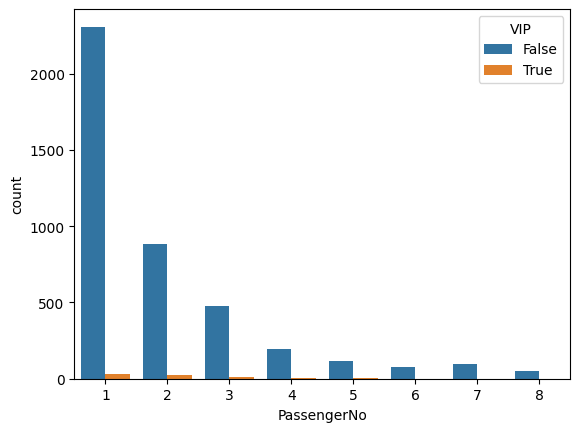

In [23]:
df.drop(['RoomNo'], axis=1,
		inplace=True)

sb.countplot(data=df,
			x = 'PassengerNo',
			hue='VIP')
plt.show()


In [24]:
new = df["Cabin"].str.split("/", n=2, expand=True)
data["F1"] = new[0]
df["F2"] = new[1].astype(int)
df["F3"] = new[2]

df.drop(['Cabin'], axis=1,
		inplace=True)


In [25]:
df['LeasureBill'] = df['RoomService'] + df['FoodCourt']\
+ df['ShoppingMall'] + df['Spa'] + df['VRDeck']


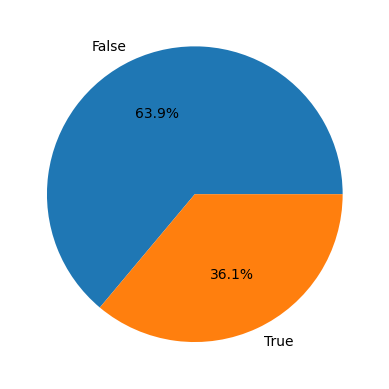

In [26]:
x = df['CryoSleep'].value_counts()
plt.pie(x.values,
		labels=x.index,
		autopct='%1.1f%%')
plt.show()


In [27]:
for col in df.columns:
	# In case of categorical column
	# encode them
	if df[col].dtype == object:
		le = LabelEncoder()
		df[col] = le.fit_transform(df[col])

	# In case of boolean data type
	# convert them to binary
	if df[col].dtype == 'bool':
		df[col] = df[col].astype(int)

df.head()




,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerNo,F2,F3,LeasureBill
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1,3,1,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,4,1,2832.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1,0,1,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1,1,1,7418.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,1,5,1,645.0


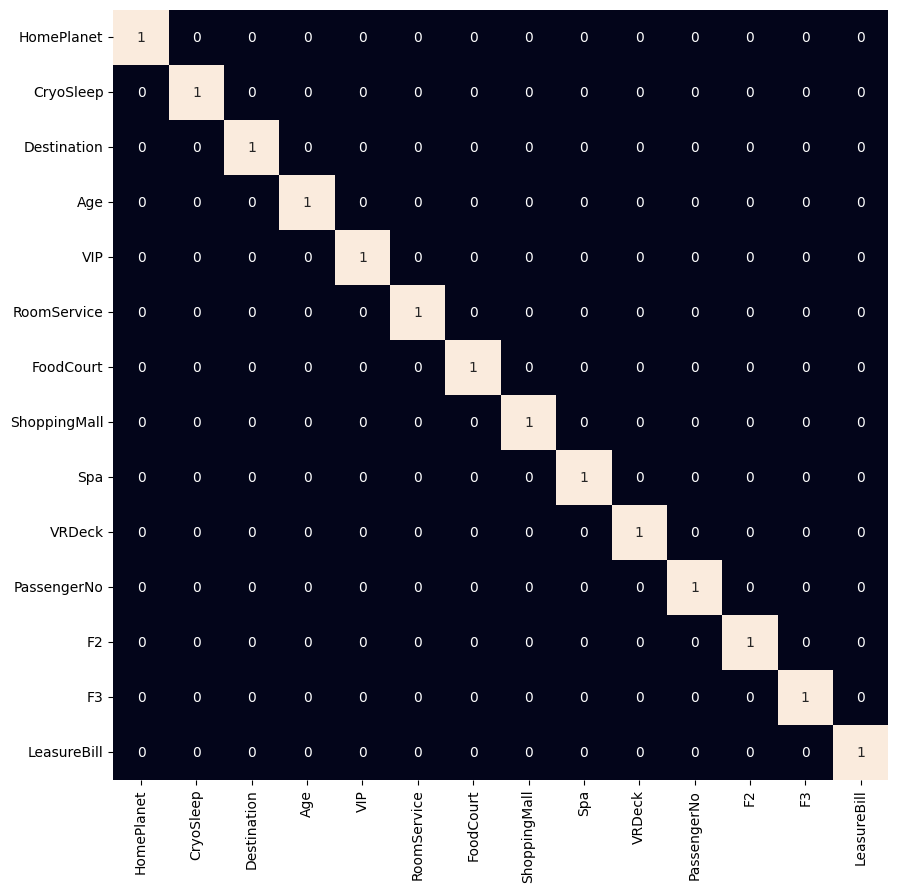

In [28]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.8,
           annot=True,
           cbar=False)
plt.show()

In [29]:
features = df.drop(['LeasureBill'], axis=1)
target = df.LeasureBill

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.1,
									random_state=22)

X_train.shape, X_val.shape


((3849, 13), (428, 13))

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define regression models
models = [LinearRegression(), RandomForestRegressor(), SVR(kernel='rbf')]

# Train and evaluate models
for model in models:
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Calculate evaluation metric (MSE)
    train_mse = mean_squared_error(Y_train, train_preds)
    val_mse = mean_squared_error(Y_val, val_preds)

    # Print model name and evaluation metric
    print(f'{model.__class__.__name__}:')
    print('Training MSE:', train_mse)
    print('Validation MSE:', val_mse)
    print()


LinearRegression:
Training MSE: 8.333603487692295e-24
Validation MSE: 8.659169564035094e-24

RandomForestRegressor:
Training MSE: 60806.61742939117
Validation MSE: 474725.54875553434

SVR:
Training MSE: 8267197.287879968
Validation MSE: 8027534.396397254

